In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy as sp
import scipy.stats as sps
import math
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Trinomial Lattice model

### Priced a vanilla European call & put

In [2]:
def TrinomialEuCall(S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Cvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        Cvals[j,N] = max(Svals[j]-K,0);

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Cvals[i,j] =discount*(p_u*Cvals[i-1,j+1]+p_m*Cvals[i,j+1]+p_d*Cvals[i+1,j+1]);

    price = Cvals[N,0];
    return price;

def TrinomialEuPut(S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        Pvals[j,N] = max(K-Svals[j],0);

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Pvals[i,j] = discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1]);
    price = Pvals[N,0];
    return price;

In [3]:
def BScallPrice(sigma,K,T,S0,r):
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T));
    d2 = d1-sigma*np.sqrt(T);
    c = S0*sps.norm.cdf(d1)-K*np.exp(-r*T)*sps.norm.cdf(d2);
    return c
 
def BSputPrice(sigma,K,T,S0,r):    
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T));
    d2 = d1-sigma*np.sqrt(T);
    c = S0*sps.norm.cdf(d1)-K*np.exp(-r*T)*sps.norm.cdf(d2);
    p = c+K*np.exp(-r*T)-S0;
    return p

In [4]:
# Given parameters
S0 = 15
K = 19
sigma = 0.3
r = 0.07
T = 0.75

In [5]:
print("Call Comparison")
print(f"TL Call Price (1 month time step): {round(TrinomialEuCall(S0,K,r,sigma,T,12),3)}")
print(f"TL Call Price (1 day time step): {round(TrinomialEuCall(S0,K,r,sigma,T,252),3)}")
print(f"BS Call Price: {round(BScallPrice(sigma,K,T,S0,r),3)}")

Call Comparison
TL Call Price (1 month time step): 0.615
TL Call Price (1 day time step): 0.599
BS Call Price: 0.6


In [6]:
print("Put Comparison")
print(f"TL Put Price (1 month time step): {round(TrinomialEuPut(S0,K,r,sigma,T,12),3)}")
print(f"TL Put Price (1 day time step): {round(TrinomialEuPut(S0,K,r,sigma,T,252),3)}")
print(f"BS Put Price: {round(BSputPrice(sigma,K,T,S0,r),3)}")

Put Comparison
TL Put Price (1 month time step): 3.645
TL Put Price (1 day time step): 3.628
BS Put Price: 3.628


Text(0, 0.5, 'Option Price')

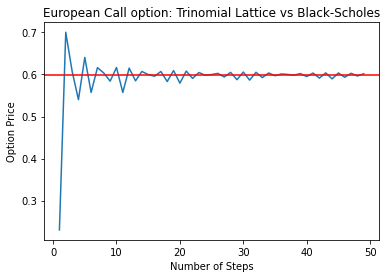

In [7]:
#Call Convergence
sim_prices_call=[]
for N in range (1,50):
    price=TrinomialEuCall(S0,K,r,sigma,T,N)
    sim_prices_call.append(price)
  
plt.plot(range(1,50),sim_prices_call)
plt.axhline(y=BScallPrice(sigma,K,T,S0,r), color='r', linestyle='-')
plt.title('European Call option: Trinomial Lattice vs Black-Scholes')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')

Text(0, 0.5, 'Option Price')

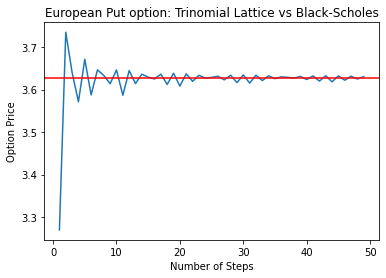

In [8]:
#Put Convergence
sim_prices_put=[]
for N in range (1,50):
    price1=TrinomialEuPut(S0,K,r,sigma,T,N)
    sim_prices_put.append(price1)
  
plt.plot(range(1,50),sim_prices_put)
plt.axhline(y=BSputPrice(sigma,K,T,S0,r), color='r', linestyle='-')
plt.title('European Put option: Trinomial Lattice vs Black-Scholes')
plt.xlabel('Number of Steps')
plt.ylabel('Option Price')

### Priced a European pay-later option

In [9]:
def TrinomialEurCallPayLater(C,S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1)); 
    Svals[0] = S0*np.exp(N*deltaX); 
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];
        
    #set up lattice and terminal values 
    Cvals = np.zeros((2*N+1,N+1))
    for j in range(0,2*N+1): 
        if Svals[j]>K:
            Cvals[j,N] = Svals[j]-K-C 
        else:
            Cvals[j,N] = 0 

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Cvals[i,j] =discount*(p_u*Cvals[i-1,j+1]+p_m*Cvals[i,j+1]+p_d*Cvals[i+1,j+1]);
    
    price = max(Cvals[N,0],0);
    return price;

In [10]:
def TrinomialEurPutPayLater(P,S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];  
        
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
    for j in range(0,2*N+1):
        if Svals[j]<K:
            Pvals[j,N] = K-Svals[j]-P
        else:
            Pvals[j,N] = 0

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            Pvals[i,j] =discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1]);
    
    price = max(Pvals[N,0],0);
    return price;

In [11]:
C = 3
P = 2
S0 = 15
K = 19
r = 0.07
sigma = 0.3
T = 0.75

In [12]:
print("One month time step:")
print(f"Pay-later EU Call Price: {round(TrinomialEurCallPayLater(C,S0,K,r,sigma,T,12),3)}")
print(f"Pay-later EU Put Price: {round(TrinomialEurPutPayLater(P,S0,K,r,sigma,T,12),3)}")

One month time step:
Pay-later EU Call Price: 0.003
Pay-later EU Put Price: 2.155


In [13]:
print("One day time step:")
print(f"Pay-later EU Call Price: {round(TrinomialEurCallPayLater(C,S0,K,r,sigma,T,252),3)}")
print(f"Pay-later EU Put Price: {round(TrinomialEurPutPayLater(P,S0,K,r,sigma,T,252),3)}")

One day time step:
Pay-later EU Call Price: 0.055
Pay-later EU Put Price: 2.093


#### Computed the premium setting option value equals to 0 at initiation

In [16]:
def TrinomialEuCallPremium(S0,K,r,sigma,T,N):
    def Trinomial_c(C):
        return (np.mean((TrinomialEurCallPayLater(C,S0,K,r,sigma,T,N))**2))
    premium = sp.optimize.minimize(Trinomial_c,0)
    return premium.x

In [17]:
def TrinomialEuPutPremium(S0,K,r,sigma,T,N):
    def Trinomial_p(P):
        return (np.mean((TrinomialEurPutPayLater(P,S0,K,r,sigma,T,N))**2))
    premium = sp.optimize.minimize(Trinomial_p,0)
    return premium.x

In [18]:
#Parameters
S0 = 15
K = 19
r = 0.07
sigma = 0.3
T = 0.75

In [19]:
print("One month time step:")
print(f"Premium setting the pay later call option to 0: {round(TrinomialEuCallPremium(S0,K,r,sigma,T,12)[0],3)}")
print(f"Premium setting the pay later put option to 0: {round(TrinomialEuPutPremium(S0,K,r,sigma,T,12)[0],3)}")

One month time step:
Premium setting the pay later call option to 0: 3.015
Premium setting the pay later put option to 0: 4.893


In [20]:
print("One day time step:")
print(f"Premium setting the pay later call option to 0: {round(TrinomialEuCallPremium(S0,K,r,sigma,T,252)[0],3)}")
print(f"Premium setting the pay later put option to 0: {round(TrinomialEuPutPremium(S0,K,r,sigma,T,252)[0],3)}")

One day time step:
Premium setting the pay later call option to 0: 3.302
Premium setting the pay later put option to 0: 4.728


### Priced an American put option

In [26]:
def TrinomialAmPut(S0,K,r,sigma,T,N): 
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        Pvals[j,N] = max(K-Svals[j],0);

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            hold=discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1])
            Pvals[i,j] = max(K-Svals[j],hold) 
    price = Pvals[N,0];
    return price;

In [27]:
#Parameters
S0 = 15
K = 12
r = 0.07
sigma = 0.3
T = 0.75
N = 12

In [28]:
print(f"AM Put Price under Trinomial Lattice (1 month time step): {round(TrinomialAmPut(S0,K,r,sigma,T,12),3)}")
print(f"AM Put Price under Trinomial Lattice (1 day time step): {round(TrinomialAmPut(S0,K,r,sigma,T,252),3)}")

AM Put Price under Trinomial Lattice (1 month time step): 0.264
AM Put Price under Trinomial Lattice (1 day time step): 0.25


### Priced an American pay-later put option

In [29]:
def LatticeAmPutPayLater(P,S0,K,r,sigma,T,N):
    deltaT = T/N
    deltaX=sigma*deltaT**0.5;#rule of thumb
    nu = r-(1/2)*sigma**2;
    discount = np.exp(-r*deltaT);
    p_u = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2+nu*deltaT/deltaX);
    p_m = (1-(sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2);
    p_d = (1/2)*((sigma**2*deltaT+nu**2*deltaT**2)/deltaX**2-nu*deltaT/deltaX);
    pm=1-p_u-p_d
    # set up S values (at maturity)
    Svals = np.zeros((2*N+1,1));
    Svals[0] = S0*np.exp(N*deltaX);
    exp_dX = np.exp(-deltaX); 
    for j in range(1,2*N+1):
        Svals[j] = exp_dX*Svals[j-1];     
    #set up lattice and terminal values 
    Pvals = np.zeros((2*N+1,N+1))
      
    for j in range(0,2*N+1):
        if Svals[j]<K:
            Pvals[j,N] = K-Svals[j]-P
        else:
            Pvals[j,N] = 0

    for j in range(N-1,-1,-1):
        for i in range(N-j,N+j+1):
            hold=discount*(p_u*Pvals[i-1,j+1]+p_m*Pvals[i,j+1]+p_d*Pvals[i+1,j+1])
            Pvals[i,j] = max(K-Svals[j]-P,hold) 
    price = max(Pvals[N,0],0);
    return price;

In [30]:
#Parameters
P = 1
S0 = 15
K = 12
r = 0.07
sigma = 0.3
T = 0.75
N = 12

In [31]:
# 1 month timestep
N = 12
print(f"AM Pay Later Put Price under Trinomial Lattice (1m timestep): {round(LatticeAmPutPayLater(P,S0,K,r,sigma,T,N),3)}")
N = 252
print(f"AM Pay Later Put Price under Trinomial Lattice (1day timestep): {round(LatticeAmPutPayLater(P,S0,K,r,sigma,T,N),3)}")

AM Pay Later Put Price under Trinomial Lattice (1m timestep): 0.099
AM Pay Later Put Price under Trinomial Lattice (1day timestep): 0.073


#### Computed the premium setting option value equals to 0 at initiation

In [40]:
def TrinomialAmPutPremium(S0,K,r,sigma,T,N):
    def Trinomial_p(P):
        return (np.mean((LatticeAmPutPayLater(P,S0,K,r,sigma,T,N))**2))
    premium = sp.optimize.minimize(Trinomial_p, 0)
    return premium.x

In [41]:
print(f"Premium setting the AM pay later put option to 0 (N=12): {round(TrinomialAmPutPremium(S0,K,r,sigma,T,12)[0],3)}")
print(f"Premium setting the AM pay later put option to 0 (N=252): {round(TrinomialAmPutPremium(S0,K,r,sigma,T,252)[0],3)}")

Premium setting the AM pay later put option to 0 (N=12): 1.598
Premium setting the AM pay later put option to 0 (N=252): 1.414


## 2. Heston (1993) stochastic volatility model

#### Return-Variance correlation - Premiums of the European pay-later Call option under Heston and BS models

In [44]:
S0 = 15 #current stock price of CCC
T = 0.75 # time to maturity, equivalent to 9 months
r = 0.07 # risk-free interest rate
kappa = 2 # mean reversion parameter
theta = 0.3**2 # long term variance
v_0 = 0.3**2 # current variance
rho = 0 # correlation coefficient
xi = 0.25 # volatility of variance parameter
N = 200 # time steps
Npaths = 50000 # number of paths

In [45]:
def Heston_paths(S0, T, r, kappa, theta, v_0, rho, xi, N, Npaths, return_vol=False):
    deltaT = T/N
    size = (Npaths, N)
    prices = np.zeros(size)
    sigs = np.zeros(size)
    S_t = S0
    v_t = v_0
    for t in range(N):
        WT = np.random.multivariate_normal(np.array([0,0]), cov = np.array([[1,rho],[rho,1]]), size=Npaths) * np.sqrt(deltaT) 

        S_t = S_t*(np.exp( (r- 0.5*v_t)*deltaT+ np.sqrt(v_t) *WT[:,0] ) ) 
        v_t = np.abs(v_t + kappa*(theta-v_t)*deltaT + xi*np.sqrt(v_t)*WT[:,1])
        prices[:, t] = S_t
        sigs[:, t] = v_t
    
    if return_vol:
        return prices, sigs
    
    return prices

In [46]:
# Implementation of the Heston Model on Pay Later European Call Option
strikes =np.linspace(2,28,200)
prices_pos = Heston_paths(S0, T, r, kappa, theta, v_0, 0.5, xi, N, Npaths,return_vol=False)[:,-1]  
prices_neg  = Heston_paths(S0, T, r, kappa, theta, v_0, -0.5, xi, N, Npaths,return_vol=False)[:,-1]    
prices_null  = Heston_paths(S0, T, r, kappa, theta, v_0, 0, xi, N, Npaths,return_vol=False)[:,-1] 

# Heston Model: EU Pay-later Call under Rho = -0.5
calls_neg = [] 

for K in strikes:
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    C = np.mean(np.maximum(prices_neg-K,0))*np.exp(-r*T)
    C = (np.exp(r*T)/sps.norm.cdf(d2))*C
    calls_neg.append(C)

# Heston Model: EU Pay-later Call under Rho = 0.5
calls_pos = [] 

for K in strikes:
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    C = np.mean(np.maximum(prices_pos-K,0))*np.exp(-r*T)
    C = (np.exp(r*T)/sps.norm.cdf(d2))*C
    calls_pos.append(C)
    
# Heston Model: EU Pay-later Call under Rho = 0.5
calls_null = [] 

for K in strikes:
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    C = np.mean(np.maximum(prices_null-K,0))*np.exp(-r*T)
    C = (np.exp(r*T)/sps.norm.cdf(d2))*C
    calls_null.append(C)

In [47]:
# Implementation of the Black Scholes Model on Pay Later European Call Option
BS_calls = []
for K in strikes:
    C = BScallpaylaterPrice(sigma,K,T,S0,r)
    BS_calls.append(C)

In [48]:
# Creating a dataframe with all the necessary data
df = pd.DataFrame(strikes, columns = ["Strikes"])
df["calls_null"] = calls_null
df["calls_neg"] = calls_neg
df["calls_pos"] = calls_pos
df["BS_calls"] = BS_calls
df["ρ= 0.5"] = df["calls_pos"] - df["BS_calls"]
df["ρ= - 0.5"] = df["calls_neg"] - df["BS_calls"]
df["ρ= 0"] = df["calls_null"] - df["BS_calls"]

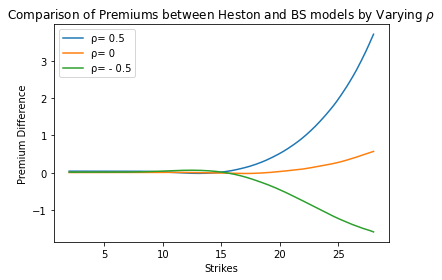

In [49]:
ax = plt.gca()
df.plot(kind='line', x="Strikes", y="ρ= 0.5",ax=ax)
df.plot(kind='line', x="Strikes", y="ρ= 0",ax=ax)
df.plot(kind='line', x="Strikes", y="ρ= - 0.5",ax=ax)
plt.ylabel('Premium Difference')
plt.xlabel('Strikes') 
plt.title(r'Comparison of Premiums between Heston and BS models by Varying $\rho$')
plt.show()

#### Volatility of variance parameter - Premiums of the European pay-later Call option under Heston and BS models

In [50]:
# Implementation of the Heston Model on Pay Later European Call Option
eta_015 = Heston_paths(S0, T, r, kappa, theta, v_0, rho, 0.15, N=N, Npaths=Npaths,return_vol=False)[:,-1]  
eta_025  = Heston_paths(S0, T, r, kappa, theta, v_0, rho, 0.25, N=N, Npaths=Npaths,return_vol=False)[:,-1]    
eta_035  = Heston_paths(S0, T, r, kappa, theta, v_0, rho, 0.35, N=N, Npaths=Npaths,return_vol=False)[:,-1] 

# Heston Model: EU Pay-later Call under η = 0.15
calls_015 = [] 

for K in strikes:
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    C = np.mean(np.maximum(eta_015-K,0))*np.exp(-r*T)
    C = (np.exp(r*T)/sps.norm.cdf(d2))*C
    calls_015.append(C)
    
# Heston Model: EU Pay-later Call under η = 0.25
calls_025 = [] 

for K in strikes:
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    C = np.mean(np.maximum(eta_025-K,0))*np.exp(-r*T)
    C = (np.exp(r*T)/sps.norm.cdf(d2))*C
    calls_025.append(C)
    
# Heston Model: EU Pay-later Call under η = 0.35
calls_035 = [] 

for K in strikes:
    d1 = (np.log(S0/K)+(r+(1/2)*sigma**2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    C = np.mean(np.maximum(eta_035-K,0))*np.exp(-r*T)
    C = (np.exp(r*T)/sps.norm.cdf(d2))*C
    calls_035.append(C)

In [51]:
# Creating a dataframe with all the necessary data
df_2 = pd.DataFrame(strikes, columns = ["Strikes"])
df_2["calls_015"] = calls_015
df_2["calls_025"] = calls_025
df_2["calls_035"] = calls_035
df_2["BS_calls"] = BS_calls
df_2["η = 15"] = df_2["calls_015"] - df_2["BS_calls"]
df_2["η = 25"] = df_2["calls_025"] - df_2["BS_calls"]
df_2["η = 35"] = df_2["calls_035"] - df_2["BS_calls"]

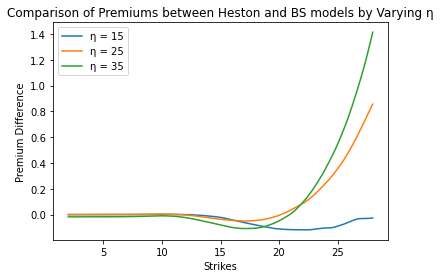

In [52]:
ax = plt.gca()
df_2.plot(kind='line', x="Strikes", y="η = 15",ax=ax)
df_2.plot(kind='line', x="Strikes", y="η = 25",ax=ax)
df_2.plot(kind='line', x="Strikes", y="η = 35",ax=ax)
plt.ylabel('Premium Difference')
plt.xlabel('Strikes') 
plt.title('Comparison of Premiums between Heston and BS models by Varying η')
plt.show()

Text(0, 0.5, 'Density')

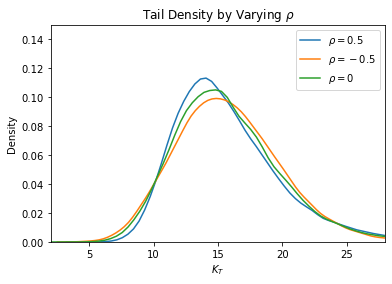

In [159]:
#Further Analysis: Tail Density by varying rho
fig, ax = plt.subplots()

ax = sns.kdeplot(data=prices_pos, label=r"$\rho = 0.5$", ax=ax)
ax = sns.kdeplot(data=prices_neg, label=r"$\rho= -0.5$ ", ax=ax)
ax = sns.kdeplot(data=prices_null, label=r"$\rho= 0$ ", ax=ax)

ax.set_title(r'Tail Density by Varying $\rho$')
plt.axis([2, 28, 0, 0.15])
plt.xlabel('$K_T$')
plt.ylabel('Density')

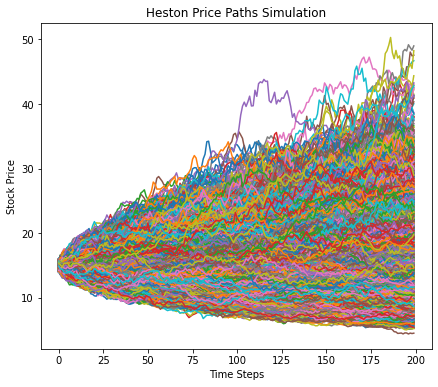

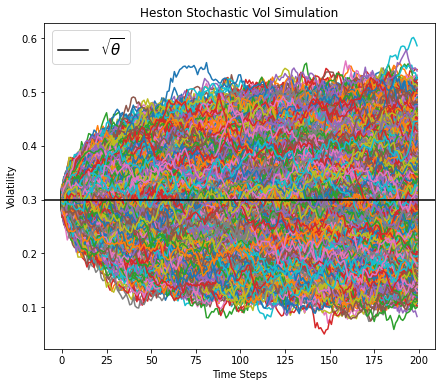

In [160]:
#Further analysis: Heston price paths simulation
prices,sigs = Heston_paths(S0, T, r, kappa, theta, v_0, rho, xi, N, Npaths, return_vol=True)        
    
plt.figure(figsize=(7,6))
plt.plot(prices.T)
plt.title('Heston Price Paths Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

plt.figure(figsize=(7,6))
plt.plot(np.sqrt(sigs).T)
plt.axhline(np.sqrt(theta), color='black', label=r'$\sqrt{\theta}$')
plt.title('Heston Stochastic Vol Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.legend(fontsize=15)
plt.show()